In [139]:
using RData, LowRankApprox, PyPlot, DataFrames, Roots

In [134]:
data = load("1kg.rds");

In [129]:
label = Array(readtable("label.1kg.txt", separator = ' ', header = false))[:];

2289-element Array{Union{Missings.Missing, String},1}:
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 "GBR"
 ⋮    
 "MKK"
 "MKK"
 "MKK"
 "MKK"
 "MKK"
 "MKK"
 "MKK"
 "MKK"
 "MKK"
 "MKK"
 "MKK"
 "MKK"

In [136]:
X = copy(data[:,1:20000]);
X = X .- mean(X,1);
n,p = size(X);
unique_label = unique(label);
W = zeros(n,length(unique_label));
for i = 1:length(unique_label)
    ind = find(l .== unique_label[i]);
    W[ind,i] = 1;
end

In [140]:
include("all.jl");

In [141]:
out = spca(X, iter = 200, nv = 20, nullprior = p/2, convtol = 1e-8, return_type = "posterior_median");

iter 5 done: norm(v) = 793.564 and diff 1.33e-02
iter 10 done: norm(v) = 792.153 and diff 3.78e-03
iter 15 done: norm(v) = 791.675 and diff 1.07e-03
iter 20 done: norm(v) = 791.533 and diff 3.06e-04
iter 25 done: norm(v) = 791.492 and diff 8.72e-05
iter 30 done: norm(v) = 791.481 and diff 2.49e-05
iter 35 done: norm(v) = 791.477 and diff 7.09e-06
iter 40 done: norm(v) = 791.476 and diff 2.02e-06
iter 45 done: norm(v) = 791.476 and diff 5.76e-07
iter 50 done: norm(v) = 791.476 and diff 1.64e-07
iter 55 done: norm(v) = 791.476 and diff 4.68e-08
iter 60 done: norm(v) = 791.476 and diff 1.33e-08
iter 62 done: norm(v) = 791.476 and diff 8.08e-09


LoadError: [91mDimensionMismatch("dimensions must match")[39m

In [147]:
R = X - out[:u] * out[:v]';

In [148]:
out1 = spca(R, iter = 200, nv = 20, nullprior = p/2, convtol = 1e-8, return_type = "posterior_median");

iter 5 done: norm(v) = 637.954 and diff 8.42e-05
iter 10 done: norm(v) = 637.954 and diff 9.95e-08
iter 12 done: norm(v) = 637.954 and diff 6.71e-09


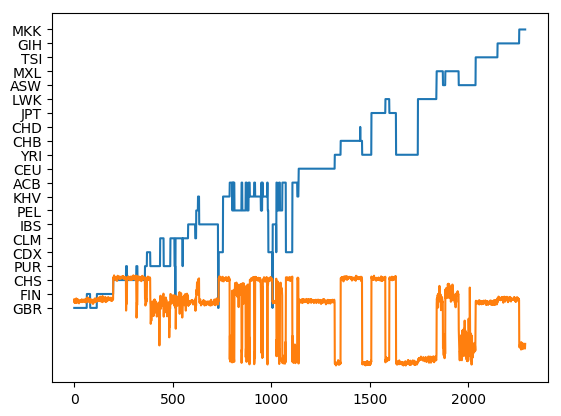

In [142]:
plot(label); plot(out[:u]*100)
savefig("F1.pdf")

In [154]:
using GadFly
using RDatasets

iris = dataset("datasets", "iris")
plot(iris, x=:SepalLength, y=:SepalWidth, color=:Species,
         Geom.point)

LoadError: [91mArgumentError: Module GadFly not found in current path.
Run `Pkg.add("GadFly")` to install the GadFly package.[39m

In [152]:
Pkg.add("GadFly")

INFO: Package GadFly is already installed
INFO: METADATA is out-of-date — you may not have the latest version of GadFly
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [86]:
out[:u][261:270]

10-element Array{Float64,1}:
  0.0221372 
  0.0201503 
  0.0211022 
 -0.00190727
  0.00425698
  0.00655572
  0.00294513
  0.00658706
  0.0211267 
  0.0218799 

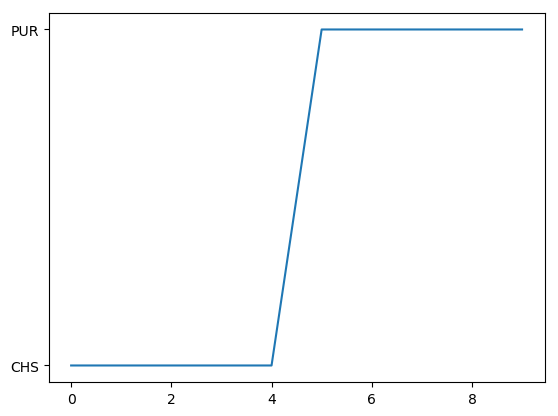

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x153cde2d0>

In [89]:
plot(label[261:270,2])

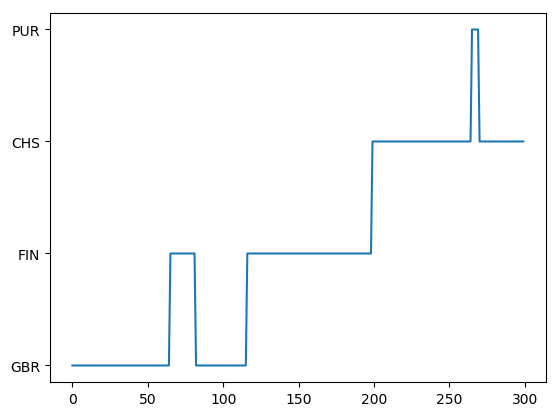

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x153c2ffd0>

In [80]:
plot(label[1:300,2])

In [66]:
(W./sum(W,1))*(W./sum(W,1))'

2289×2289 Array{Float64,2}:
 9.24556e-5  9.24556e-5  9.24556e-5  …  0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5  …  0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5  …  0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.0 
 9.24556e-5  9.24556e-5  9.24556e-5     0.0         0.0         0.0   0.